In [165]:
# importing libraries
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline
import IPython.display
import librosa
import librosa.display
from scipy import interpolate

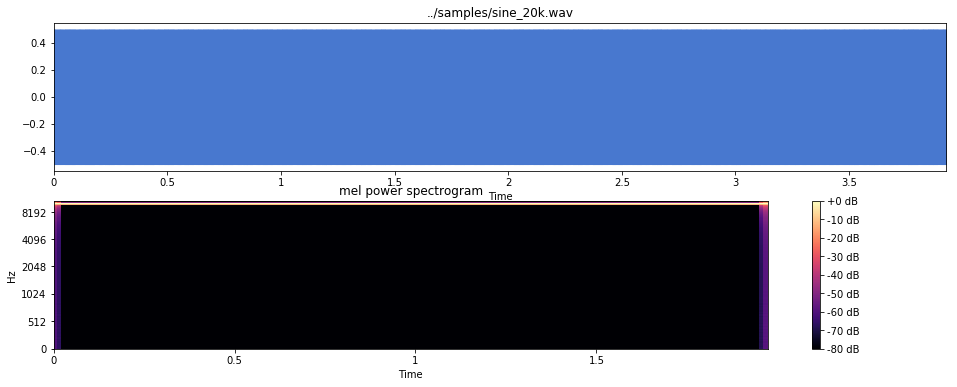

In [166]:
track = '../samples/sine_20k.wav'
x, sr = librosa.load(track, sr = 44100, mono = 'True')
plt.figure(figsize=(16,6))
plt.subplot(2,1,1)
librosa.display.waveplot(x)
plt.title(track)

S = librosa.feature.melspectrogram(x, sr=sr, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
plt.subplot(2,1,2)
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')

In [167]:
# initialising STFT params
N = 2 ** 15 #FFT size
M = N     #window size
H = N/16  #hop size
W = np.hanning(N)#'hann'

(16385, 43) (16385, 43) (16385, 43)


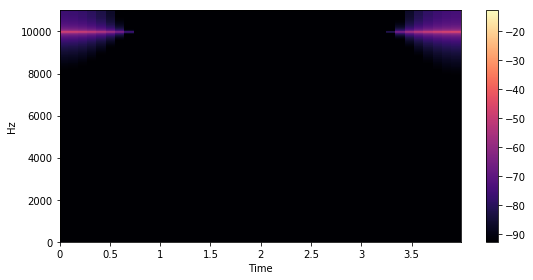

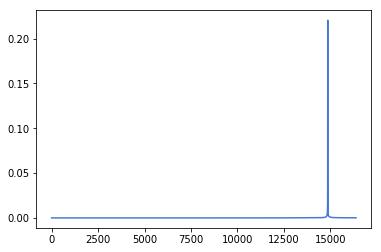

In [168]:
stft = librosa.stft(y = x, n_fft = N, hop_length = H, win_length = M, window = W, center = 'False')
mX, pX = librosa.magphase(stft)
mX =  mX / np.sum(W) #normlaising STFT output

print np.shape(mX), np.shape(pX), np.shape(stft)

plt.figure(figsize=(8, 4))
librosa.display.specshow(librosa.amplitude_to_db(mX, ref=1.0), x_axis='time', y_axis='linear', hop_length=H)
plt.colorbar()
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(np.abs(mX[:,1]))
plt.show()


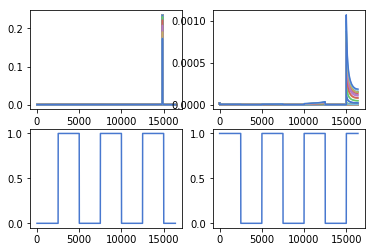

In [169]:
dc=2500
arr1=[]
arr2=[]
ons = np.zeros(dc)
ofs = np.ones(dc)
arr1 = np.append(ons,ofs)
arr2 = np.append(ofs,ons)
while ((np.size(arr1)<np.size(stft,axis=0)) and (np.size(arr2)<np.size(stft,axis=0))):
    arr1 = np.append(arr1,arr1)
    arr2 = np.append(arr2,arr2)
sq1 = arr1[0:np.size(stft,axis=0)]
sq2 = arr2[0:np.size(stft,axis=0)]

mY1 = np.copy(mX) #np.zeros(np.shape(mX))
mY1 = np.transpose(np.transpose(mY1) * np.matlib.repmat(sq1, np.size(stft,axis=1), 1))


mY2 = np.copy(mX) #np.zeros(np.shape(mX))
mY2 = np.transpose(np.transpose(mY2) * np.matlib.repmat(sq2 , np.size(stft,axis=1), 1))

plt.figure()
plt.subplot(2,2,1)
plt.plot(np.abs(mY1))
plt.subplot(2,2,3)
plt.plot(sq1)

plt.subplot(2,2,2)
plt.plot(np.abs(mY2))
plt.subplot(2,2,4)
plt.plot(sq2)
plt.show()


In [170]:
mY1 = mY1 * np.exp(1j*np.angle(pX))
mY2 = mY2 * np.exp(1j*np.angle(pX))
Y1 = librosa.istft(mY1, hop_length = H, win_length = M, window = W, center = 'False')
Y2 = librosa.istft(mY2, hop_length = H, win_length = M, window = W, center = 'False')

In [171]:
import IPython.display as ipd
ipd.Audio(Y1, rate=sr)

In [172]:
ipd.Audio(Y2, rate=sr)

In [173]:
ipd.Audio(x, rate=sr)

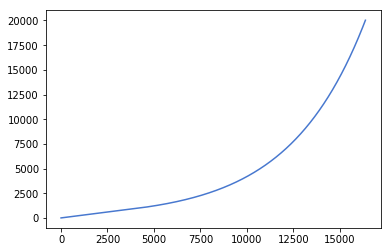

20025.000000000004
20.237202511120913


In [174]:
plt.figure()
freq = librosa.mel_frequencies(n_mels=2**14, fmin=20.0, fmax=20025.0, htk=False)
plt.plot(freq)
plt.show()
print np.max(freq)

print freq[1]

In [176]:
# y = np.abs(mX[:,1])
# hz=librosa.fft_frequencies(sr=sr, n_fft=N)
# f = interpolate.interp1d(np.arange(0,N/2+1), y)
# y = f(hz)
# print np.shape(y)

In [177]:
y = np.abs(mX[0:N/2,1])
print np.shape(y)


(16384,)


In [178]:
print np.max(y)

0.22053446


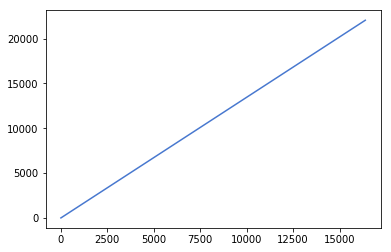

0.0
(16384,)


In [180]:
hz=librosa.fft_frequencies(sr=sr, n_fft=N)
np.shape(hz)
plt.figure()
plt.plot(hz)
plt.show()
print hz[0]
print np.shape(hz[0:N/2])

In [132]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

a = [1,3,6,9]
print find_nearest(a,7)

6


In [158]:
m = [1,2,3]
b = [10,20,30]
c= [0,0]
for i in range(len(a)):
    c = np.append(c,[a[i], b[i]])   
c = np.arange(6).reshape((np.size(a), 2))
print c
print np.shape(c)
print c[1][0]

[[0 1]
 [2 3]
 [4 5]]
(3, 2)
2
